<a href="https://colab.research.google.com/github/megmkoch/IceJamProjectFall2022/blob/main/2017_2018_IceJamProjectFall2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install geopandas
!pip install libpysal
!pip install rasterio
!pip install earthpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 18.5 MB/s 
     |████████████████████████████████| 16.7 MB 67.0 MB/s 
     |████████████████████████████████| 6.3 MB 64.3 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 24.8 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 19.3 MB 1.2 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.4 MB 27.1 MB/s 


In [2]:
import numpy as np
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import rasterio as rio
from rasterio.plot import plotting_extent
import earthpy as et
import earthpy.plot as ep

In [3]:
import urllib.request

#define online filepath (aka url)
#Dec02-Dec14
dec142017_url = 'https://d3gm2hf49xd6jj.cloudfront.net/9ddb8b1b-a5ef-4c6d-b4ab-39aa34d4df8a/S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3.zip'

#define local filepath
dec142017_filepath = 'S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3.zip'

#download data
urllib.request.urlretrieve(dec142017_url, dec142017_filepath)

#unzip file 
!unzip S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3.zip

Archive:  S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3.zip
   creating: S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/
  inflating: S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3_color_phase.png.aux.xml  
  inflating: S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3_amp.tif.xml  
  inflating: S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3_unw_phase.png  
  inflating: S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3_wrapped_phase.tif  
  inflating: S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3_water_mask.tif.xml  
  inflating: S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/S1AA

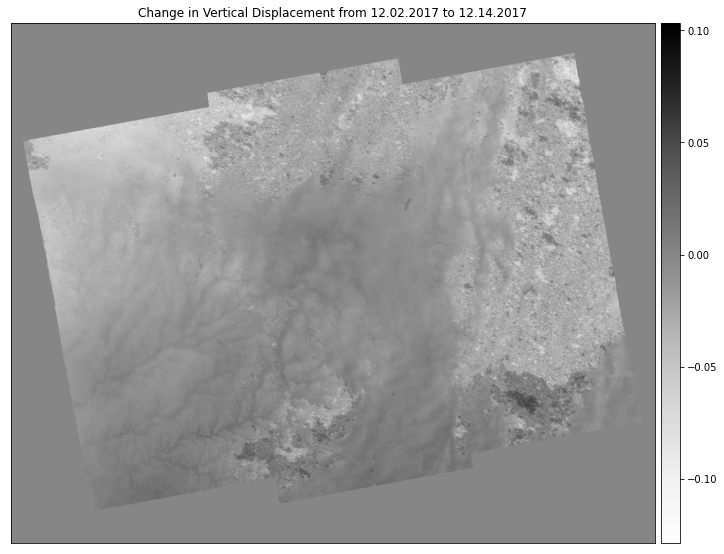

In [4]:
# open and plot vertical displacement map
with rio.open('S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3_vert_disp.tif') as vert_disp_src:
    dec142017 = vert_disp_src.read(1)

ep.plot_bands(dec142017,
              title="Change in Vertical Displacement from 12.02.2017 to 12.14.2017",
              cmap="Greys")

plt.show()

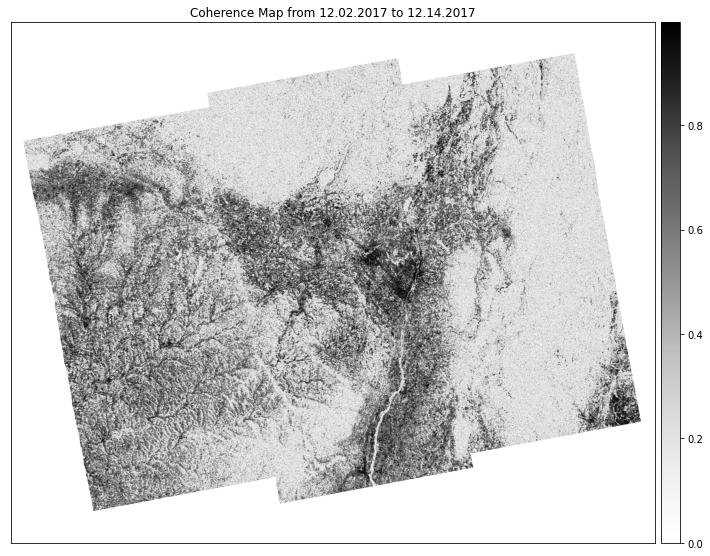

In [5]:
with rio.open('S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3/S1AA_20171202T225122_20171214T225122_VVP012_INT80_G_ueF_32A3_corr.tif') as coherence_src:
    dec142017_corr = coherence_src.read(1)

ep.plot_bands(dec142017_corr,
              title="Coherence Map from 12.02.2017 to 12.14.2017",
              cmap="Greys")

plt.show()

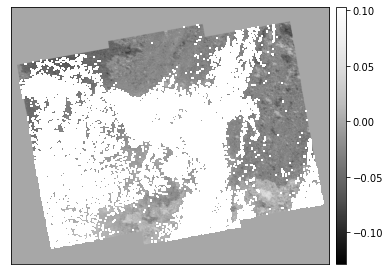

In [6]:
# masking the vertical displacement array (dec142017) by using coherence array (dec142017_corr) where condition coherence array >0.8 is true
dec142017_mask = np.ma.masked_where(dec142017_corr > 0.8, dec142017)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(dec142017_mask,
               ax=ax,
               scale=False)
plt.show()

In [7]:
#define online filepath (aka url)
#Dec14-Dec26
dec262017_url = 'https://d3gm2hf49xd6jj.cloudfront.net/2d1d8103-bc7f-473f-a0d8-882b7a241aaf/S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2.zip'

#define local filepath
dec262017_filepath = 'S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2.zip'

#download data
urllib.request.urlretrieve(dec262017_url, dec262017_filepath)

#unzip file 
!unzip S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2.zip

Archive:  S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2.zip
   creating: S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/
  inflating: S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2_color_phase.png.aux.xml  
  inflating: S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2_water_mask.tif.xml  
  inflating: S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2_unw_phase.png  
  inflating: S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2_wrapped_phase.tif.xml  
  inflating: S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2_corr.tif  
  inflating: S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/S1A

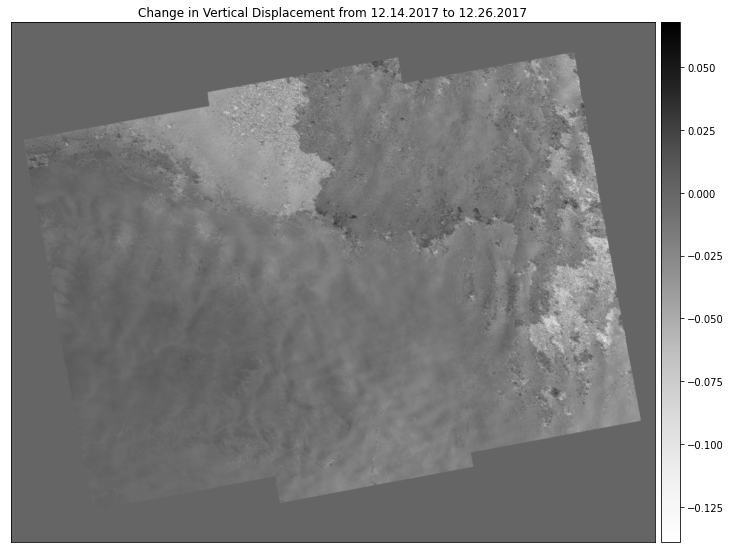

In [8]:
# open and plot vertical displacement map
with rio.open('S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2_vert_disp.tif') as vert_disp_src:
    dec262017 = vert_disp_src.read(1)

ep.plot_bands(dec262017,
              title="Change in Vertical Displacement from 12.14.2017 to 12.26.2017",
              cmap="Greys")

plt.show()

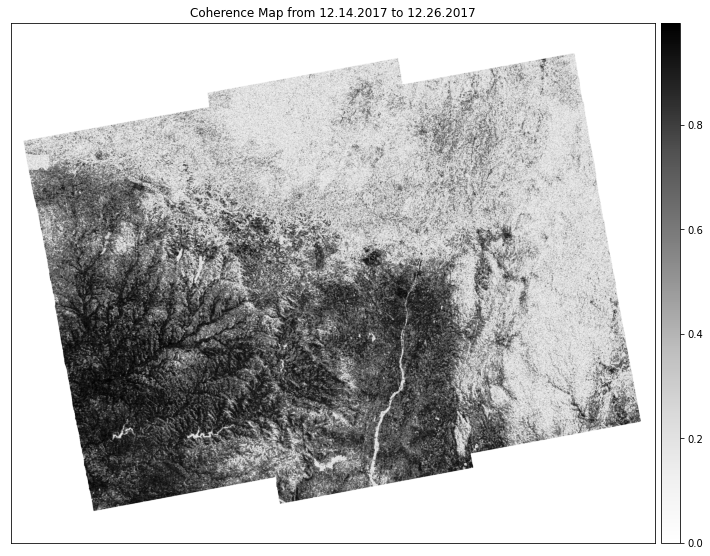

In [9]:
with rio.open('S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2/S1AA_20171214T225122_20171226T225121_VVP012_INT80_G_ueF_41D2_corr.tif') as coherence_src:
    dec262017_corr = coherence_src.read(1)

ep.plot_bands(dec262017_corr,
              title="Coherence Map from 12.14.2017 to 12.26.2017",
              cmap="Greys")

plt.show()

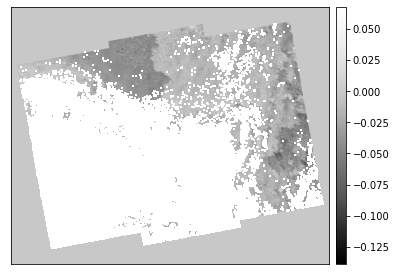

In [10]:
# masking the vertical displacement array (dec262017) by using coherence array (dec262017_corr) where condition coherence array >0.8 is true
dec262017_mask = np.ma.masked_where(dec262017_corr > 0.8, dec262017)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(dec262017_mask,
               ax=ax,
               scale=False)
plt.show()

In [11]:
#define online filepath (aka url)
#Dec26-Jan07
jan072018_url = 'https://d3gm2hf49xd6jj.cloudfront.net/6b771cff-30e6-4a72-bbe8-fcfc877338df/S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF.zip'

#define local filepath
jan072018_filepath = 'S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF.zip'

#download data
urllib.request.urlretrieve(jan072018_url, jan072018_filepath)

#unzip file 
!unzip S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF.zip

Archive:  S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF.zip
   creating: S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/
  inflating: S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF_color_phase.png  
  inflating: S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF_amp.tif.xml  
  inflating: S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF_water_mask.tif.xml  
  inflating: S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF_color_phase.kmz  
  inflating: S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF.README.md.txt  
  inflating: S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/S1AA_20171226T

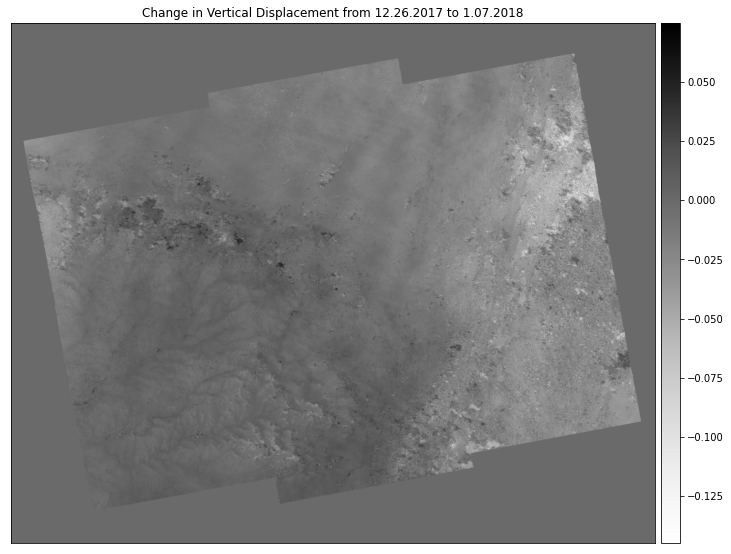

In [12]:
# open and plot vertical displacement map
with rio.open('S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF_vert_disp.tif') as vert_disp_src:
    jan072018 = vert_disp_src.read(1)

ep.plot_bands(jan072018,
              title="Change in Vertical Displacement from 12.26.2017 to 1.07.2018",
              cmap="Greys")

plt.show()

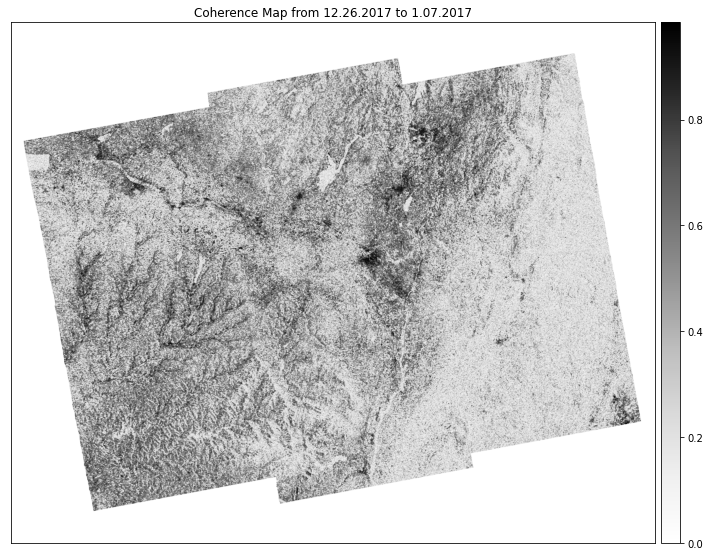

In [13]:
with rio.open('S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF/S1AA_20171226T225121_20180107T225121_VVP012_INT80_G_ueF_69FF_corr.tif') as coherence_src:
    jan072018_corr = coherence_src.read(1)

ep.plot_bands(jan072018_corr,
              title="Coherence Map from 12.26.2017 to 1.07.2017",
              cmap="Greys")

plt.show()

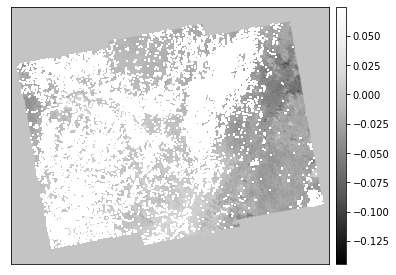

In [14]:
# masking the vertical displacement array (jan072018) by using coherence array (jan072018_corr) where condition coherence array >0.8 is true
jan072018_mask = np.ma.masked_where(jan072018_corr > 0.8, jan072018)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan072018_mask,
               ax=ax,
               scale=False)
plt.show()

In [15]:
#define online filepath (aka url)
#Jan07-Jan19
jan192018_url = 'https://d3gm2hf49xd6jj.cloudfront.net/25cf539a-1ff6-43cd-881b-3adf2cb43103/S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957.zip'

#define local filepath
jan192018_filepath = 'S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957.zip'

#download data
urllib.request.urlretrieve(jan192018_url, jan192018_filepath)

#unzip file 
!unzip S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957.zip

Archive:  S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957.zip
   creating: S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/
  inflating: S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957_amp.tif  
  inflating: S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957.README.md.txt  
  inflating: S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957_unw_phase.tif  
  inflating: S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957_wrapped_phase.tif.xml  
  inflating: S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957_unw_phase.tif.xml  
  inflating: S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/S1AA_20180107T2

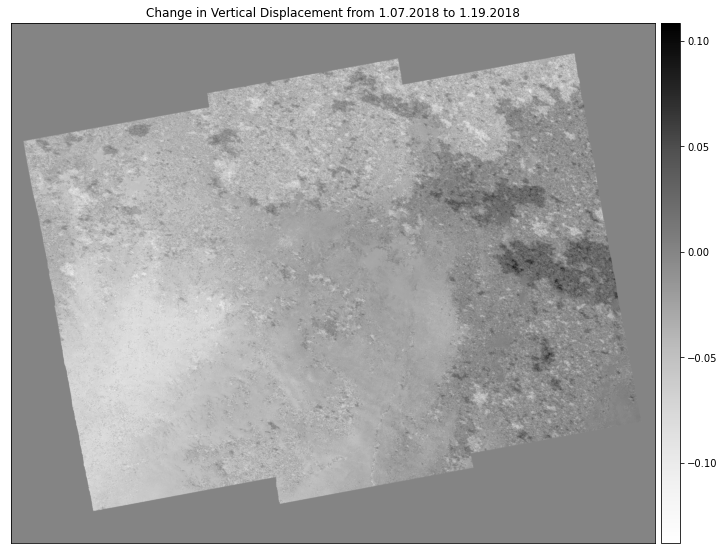

In [16]:
# open and plot vertical displacement map
with rio.open('S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957_vert_disp.tif') as vert_disp_src:
    jan192018 = vert_disp_src.read(1)

ep.plot_bands(jan192018,
              title="Change in Vertical Displacement from 1.07.2018 to 1.19.2018",
              cmap="Greys")

plt.show()

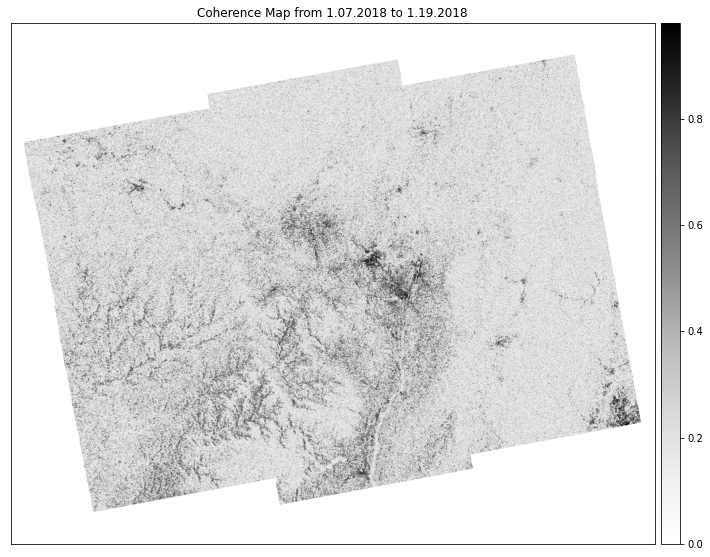

In [17]:
with rio.open('S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957/S1AA_20180107T225121_20180119T225120_VVP012_INT80_G_ueF_A957_corr.tif') as coherence_src:
    jan192018_corr = coherence_src.read(1)

ep.plot_bands(jan192018_corr,
              title="Coherence Map from 1.07.2018 to 1.19.2018",
              cmap="Greys")

plt.show()

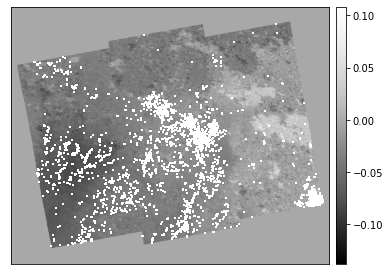

In [18]:
# masking the vertical displacement array (jan192018) by using coherence array (jan192018_corr) where condition coherence array >0.8 is true
jan192018_mask = np.ma.masked_where(jan192018_corr > 0.8, jan192018)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan192018_mask,
               ax=ax,
               scale=False)
plt.show()

In [19]:
#define online filepath (aka url)
#Jan19-Jan31
jan312018_url = 'https://d3gm2hf49xd6jj.cloudfront.net/b26a3145-a489-40da-ad1d-21aa95e4885f/S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE.zip'

#define local filepath
jan312018_filepath = 'S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE.zip'

#download data
urllib.request.urlretrieve(jan312018_url, jan312018_filepath)

#unzip file 
!unzip S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE.zip

Archive:  S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE.zip
   creating: S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/
  inflating: S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE_color_phase.png.aux.xml  
  inflating: S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE_wrapped_phase.tif  
  inflating: S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE_unw_phase.tif  
  inflating: S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE_unw_phase.kmz  
  inflating: S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE.txt  
  inflating: S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/S1AA_20180119T225

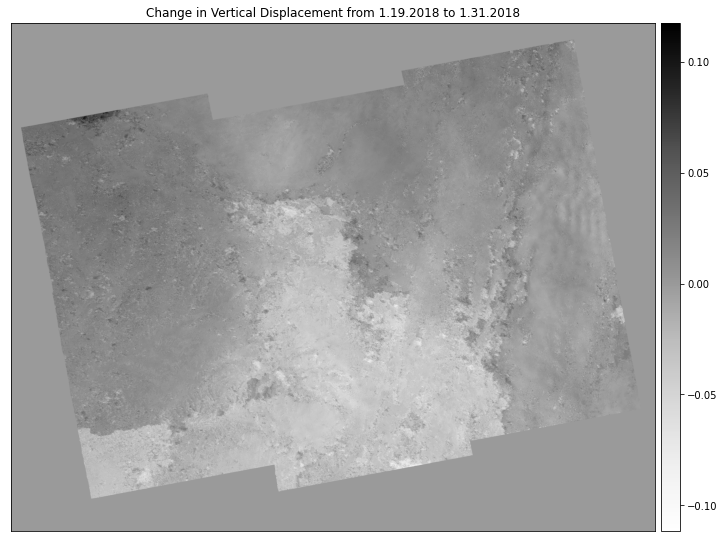

In [20]:
# open and plot vertical displacement map
with rio.open('S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE_vert_disp.tif') as vert_disp_src:
    jan312018 = vert_disp_src.read(1)

ep.plot_bands(jan312018,
              title="Change in Vertical Displacement from 1.19.2018 to 1.31.2018",
              cmap="Greys")

plt.show()

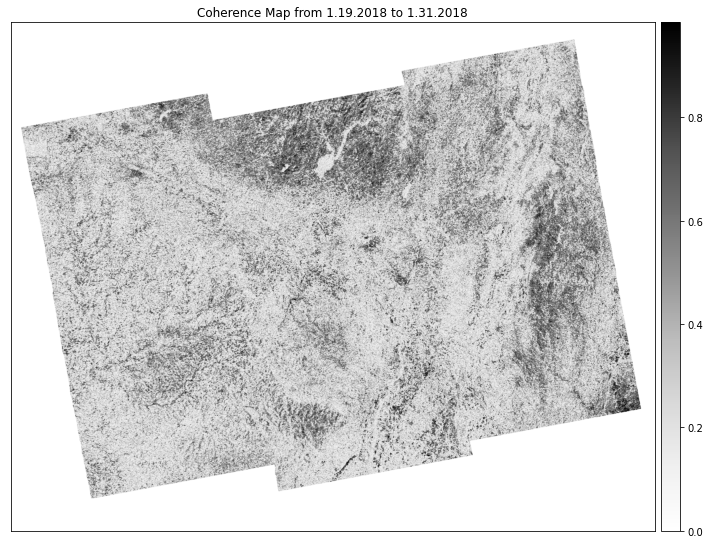

In [21]:
with rio.open('S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE/S1AA_20180119T225120_20180131T225120_VVP012_INT80_G_ueF_6DEE_corr.tif') as coherence_src:
    jan312018_corr = coherence_src.read(1)

ep.plot_bands(jan312018_corr,
              title="Coherence Map from 1.19.2018 to 1.31.2018",
              cmap="Greys")

plt.show()

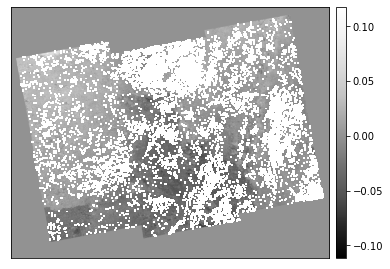

In [22]:
# masking the vertical displacement array (jan312018) by using coherence array (jan312018_corr) where condition coherence array >0.8 is true
jan312018_mask = np.ma.masked_where(jan312018_corr > 0.8, jan312018)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(jan312018_mask,
               ax=ax,
               scale=False)
plt.show()

In [23]:
#define online filepath (aka url)
#Jan31-Feb12
feb122018_url = 'https://d3gm2hf49xd6jj.cloudfront.net/87b99863-9f61-4e4d-9f8d-2b27d37c361c/S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF.zip'

#define local filepath
feb122018_filepath = 'S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF.zip'

#download data
urllib.request.urlretrieve(feb122018_url, feb122018_filepath)

#unzip file 
!unzip S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF.zip

Archive:  S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF.zip
   creating: S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/
  inflating: S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF_water_mask.tif.xml  
  inflating: S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF_water_mask.tif  
  inflating: S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF_unw_phase.png  
  inflating: S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF_color_phase.kmz  
  inflating: S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF_los_disp.tif  
  inflating: S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/S1AA_20180131T

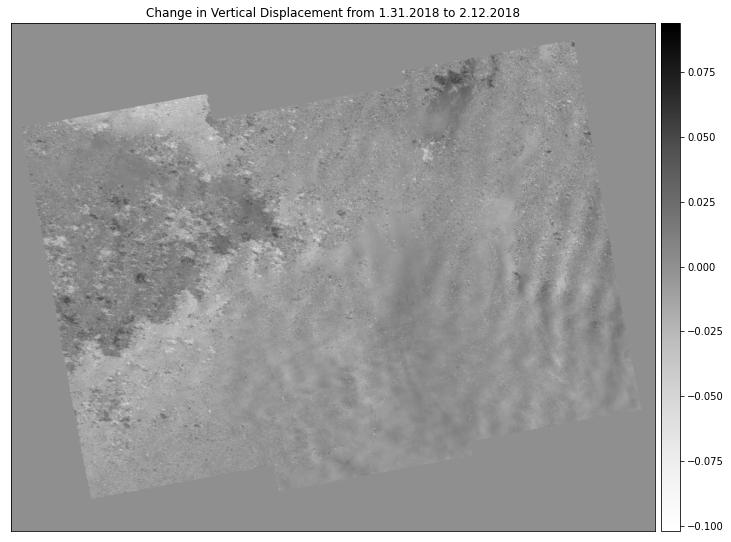

In [24]:
# open and plot vertical displacement map
with rio.open('S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF_vert_disp.tif') as vert_disp_src:
    feb122018 = vert_disp_src.read(1)

ep.plot_bands(feb122018,
              title="Change in Vertical Displacement from 1.31.2018 to 2.12.2018",
              cmap="Greys")

plt.show()

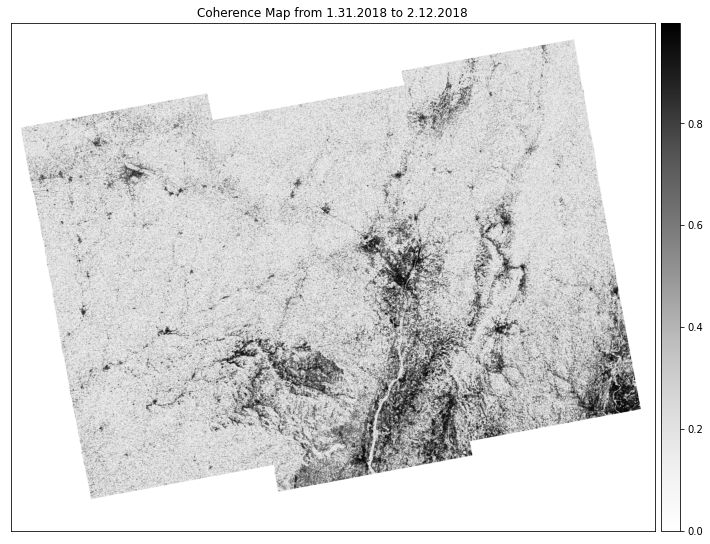

In [25]:
with rio.open('S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF/S1AA_20180131T225120_20180212T225120_VVP012_INT80_G_ueF_5CCF_corr.tif') as coherence_src:
    feb122018_corr = coherence_src.read(1)

ep.plot_bands(feb122018_corr,
              title="Coherence Map from 1.31.2018 to 2.12.2018",
              cmap="Greys")

plt.show()

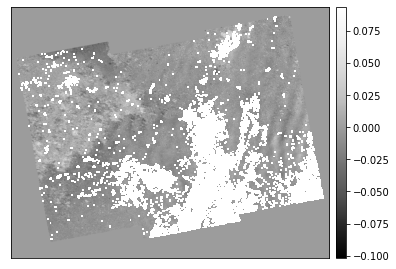

In [26]:
# masking the vertical displacement array (feb122018) by using coherence array (feb122018_corr) where condition coherence array >0.8 is true
feb122018_mask = np.ma.masked_where(feb122018_corr > 0.8, feb122018)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(feb122018_mask,
               ax=ax,
               scale=False)
plt.show()

In [27]:
#define online filepath (aka url)
#Feb12-Mar08
mar082018_url = 'https://d3gm2hf49xd6jj.cloudfront.net/b474d816-d080-475a-a7f6-af10ddc438fa/S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586.zip'

#define local filepath
mar082018_filepath = 'S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586.zip'

#download data
urllib.request.urlretrieve(mar082018_url, mar082018_filepath)

#unzip file 
!unzip S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586.zip

Archive:  S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586.zip
   creating: S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/
  inflating: S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586_unw_phase.tif  
  inflating: S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586_water_mask.tif.xml  
  inflating: S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586.txt  
  inflating: S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586_vert_disp.tif.xml  
  inflating: S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586_color_phase.png.xml  
  inflating: S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/S1AA_20180212T22

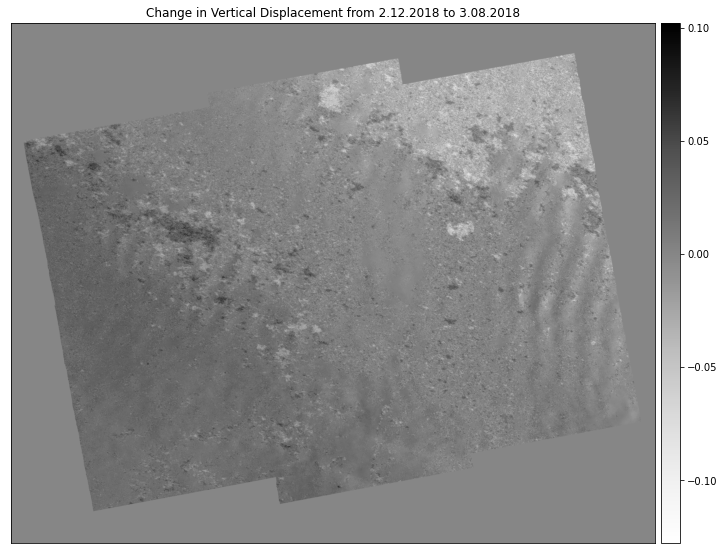

In [28]:
# open and plot vertical displacement map
with rio.open('S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586_vert_disp.tif') as vert_disp_src:
    mar082018 = vert_disp_src.read(1)

ep.plot_bands(mar082018,
              title="Change in Vertical Displacement from 2.12.2018 to 3.08.2018",
              cmap="Greys")

plt.show()

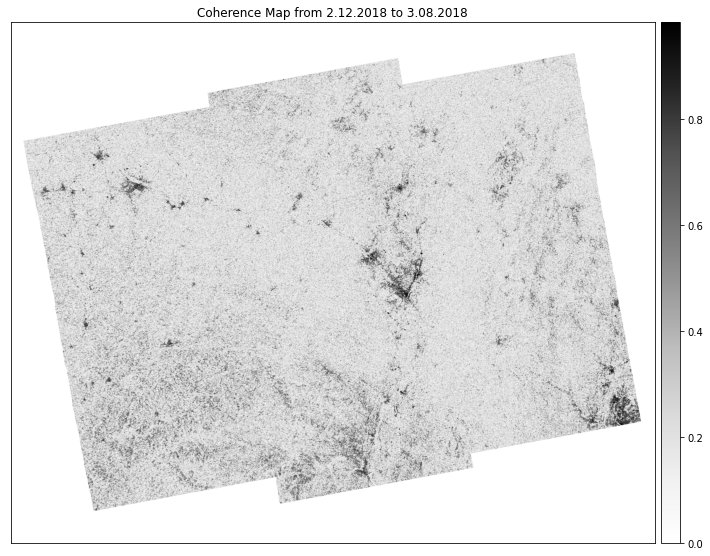

In [29]:
with rio.open('S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586/S1AA_20180212T225120_20180308T225120_VVP024_INT80_G_ueF_2586_corr.tif') as coherence_src:
    mar082018_corr = coherence_src.read(1)

ep.plot_bands(mar082018_corr,
              title="Coherence Map from 2.12.2018 to 3.08.2018",
              cmap="Greys")

plt.show()

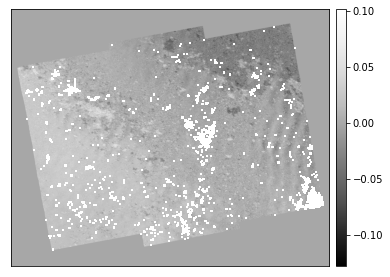

In [30]:
# masking the vertical displacement array (mar082018) by using coherence array (mar082018_corr) where condition coherence array >0.8 is true
mar082018_mask = np.ma.masked_where(mar082018_corr > 0.8, mar082018)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar082018_mask,
               ax=ax,
               scale=False)
plt.show()

In [31]:
#define online filepath (aka url)
#Mar08-Mar20
mar202018_url = 'https://d3gm2hf49xd6jj.cloudfront.net/60652675-c468-4269-9286-d1d03b36ca40/S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC.zip'

#define local filepath
mar202018_filepath = 'S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC.zip'

#download data
urllib.request.urlretrieve(mar202018_url, mar202018_filepath)

#unzip file 
!unzip S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC.zip

Archive:  S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC.zip
   creating: S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/
  inflating: S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC_wrapped_phase.tif.xml  
  inflating: S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC_unw_phase.tif  
  inflating: S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC_amp.tif.xml  
  inflating: S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC_los_disp.tif  
  inflating: S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC_los_disp.tif.xml  
  inflating: S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/S1AA_20180308

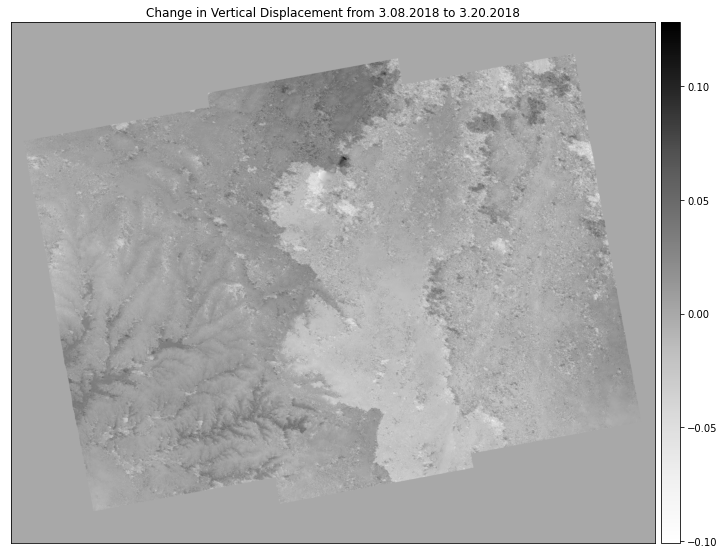

In [32]:
# open and plot vertical displacement map
with rio.open('S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC_vert_disp.tif') as vert_disp_src:
    mar202018 = vert_disp_src.read(1)

ep.plot_bands(mar202018,
              title="Change in Vertical Displacement from 3.08.2018 to 3.20.2018",
              cmap="Greys")

plt.show()

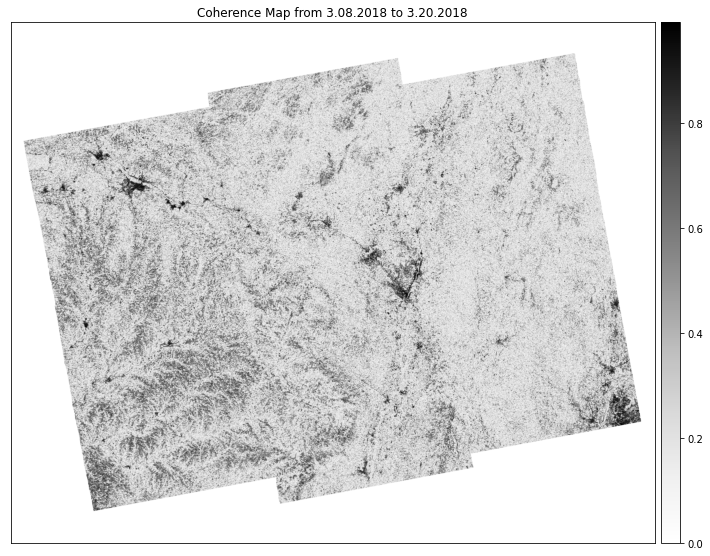

In [33]:
with rio.open('S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC/S1AA_20180308T225120_20180320T225120_VVP012_INT80_G_ueF_CEFC_corr.tif') as coherence_src:
    mar202018_corr = coherence_src.read(1)

ep.plot_bands(mar202018_corr,
              title="Coherence Map from 3.08.2018 to 3.20.2018",
              cmap="Greys")

plt.show()

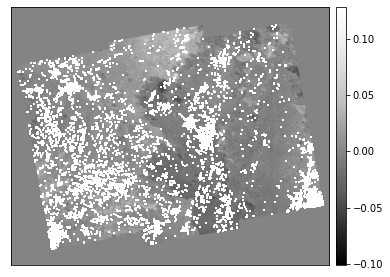

In [34]:
# masking the vertical displacement array (mar202018) by using coherence array (mar202018_corr) where condition coherence array >0.8 is true
mar202018_mask = np.ma.masked_where(mar202018_corr > 0.8, mar202018)
  
# plot vertical displacement array masked by coherence
fig, ax = plt.subplots(figsize=(6,6))
ep.plot_bands(mar202018_mask,
               ax=ax,
               scale=False)
plt.show()